In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Generate new dataset based on sine function
x_sine = np.linspace(0, 1, 100)  # 100 points in the range [0,1]
y_true_sine = np.sin(2 * np.pi * x_sine)  # True function without noise
noise_sine = np.random.normal(0, 0.2, size=x_sine.shape)  # Gaussian noise
y_sine = y_true_sine + noise_sine  # Observed values with noise

# Split into train, validation, and test sets
x_train_sine, y_train_sine = x_sine[:60], y_sine[:60]
x_val_sine, y_val_sine = x_sine[60:80], y_sine[60:80]
x_test_sine, y_test_sine = x_sine[80:], y_sine[80:]

# Save datasets
df_train_sine = pd.DataFrame({"x": x_train_sine, "y": y_train_sine})
df_val_sine = pd.DataFrame({"x": x_val_sine, "y": y_val_sine})
df_test_sine = pd.DataFrame({"x": x_test_sine, "y": y_test_sine})

df_train_sine.to_csv("bias_variance_sine_train.csv", index=False)
df_val_sine.to_csv("bias_variance_sine_val.csv", index=False)
df_test_sine.to_csv("bias_variance_sine_test.csv", index=False)

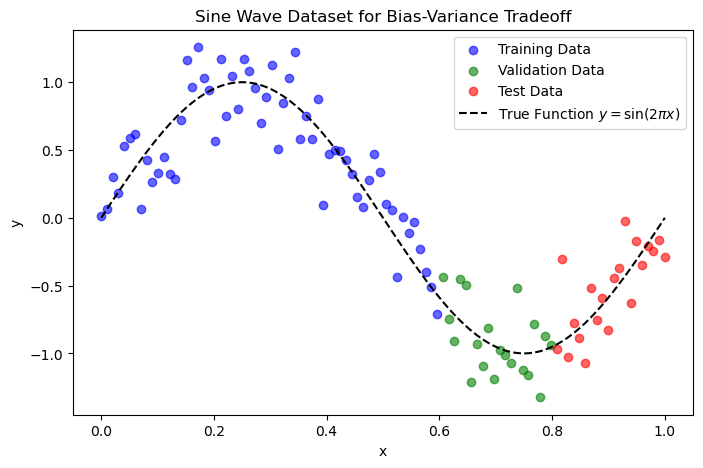

In [7]:
# Plot the dataset
plt.figure(figsize=(8, 5))
plt.scatter(x_train_sine, y_train_sine, label="Training Data", color="blue", alpha=0.6)
plt.scatter(x_val_sine, y_val_sine, label="Validation Data", color="green", alpha=0.6)
plt.scatter(x_test_sine, y_test_sine, label="Test Data", color="red", alpha=0.6)
plt.plot(x_sine, y_true_sine, label="True Function $y = \sin(2\pi x)$", color="black", linestyle="dashed")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine Wave Dataset for Bias-Variance Tradeoff")
plt.show()

In [8]:
### Coding with Linear Model

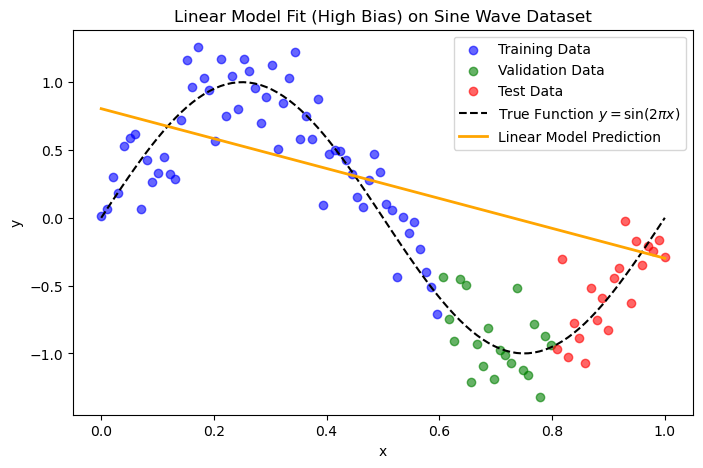

In [9]:
from sklearn.linear_model import LinearRegression

# Reshape x values for model training
x_train_sine_reshaped = x_train_sine.reshape(-1, 1)
x_val_sine_reshaped = x_val_sine.reshape(-1, 1)
x_test_sine_reshaped = x_test_sine.reshape(-1, 1)
x_sine_reshaped = x_sine.reshape(-1, 1)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train_sine_reshaped, y_train_sine)

# Predict on full range
y_pred_train = linear_model.predict(x_train_sine_reshaped)
y_pred_val = linear_model.predict(x_val_sine_reshaped)
y_pred_test = linear_model.predict(x_test_sine_reshaped)
y_pred_full = linear_model.predict(x_sine_reshaped)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x_train_sine, y_train_sine, label="Training Data", color="blue", alpha=0.6)
plt.scatter(x_val_sine, y_val_sine, label="Validation Data", color="green", alpha=0.6)
plt.scatter(x_test_sine, y_test_sine, label="Test Data", color="red", alpha=0.6)
plt.plot(x_sine, y_true_sine, label="True Function $y = \sin(2\pi x)$", color="black", linestyle="dashed")
plt.plot(x_sine, y_pred_full, label="Linear Model Prediction", color="orange", linewidth=2)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Model Fit (High Bias) on Sine Wave Dataset")
plt.show()


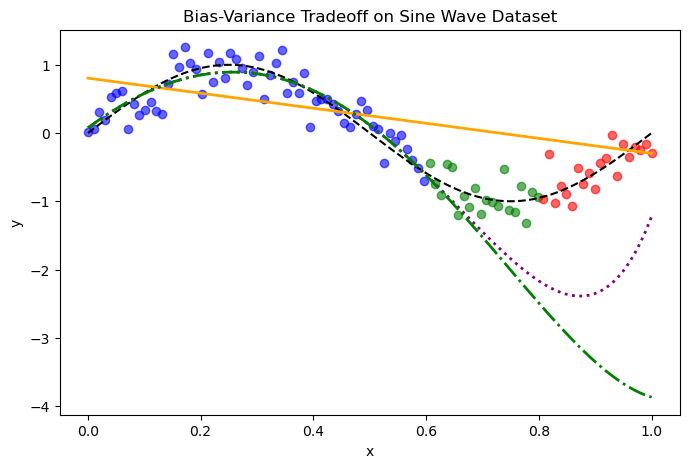

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

# Define polynomial degrees
high_variance_degree = 20  # Overfitting
optimal_degree = 6  # Best tradeoff

# Train a high-variance (overfitting) polynomial model
high_variance_model = make_pipeline(PolynomialFeatures(high_variance_degree), Ridge(alpha=1e-3))
high_variance_model.fit(x_train_sine_reshaped, y_train_sine)
y_pred_high_variance = high_variance_model.predict(x_sine_reshaped)

# Train an optimal polynomial model
optimal_model = make_pipeline(PolynomialFeatures(optimal_degree), Ridge(alpha=1e-3))
optimal_model.fit(x_train_sine_reshaped, y_train_sine)
y_pred_optimal = optimal_model.predict(x_sine_reshaped)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x_train_sine, y_train_sine, label="Training Data", color="blue", alpha=0.6)
plt.scatter(x_val_sine, y_val_sine, label="Validation Data", color="green", alpha=0.6)
plt.scatter(x_test_sine, y_test_sine, label="Test Data", color="red", alpha=0.6)
plt.plot(x_sine, y_true_sine, label="True Function $y = \sin(2\pi x)$", color="black", linestyle="dashed")

# Model predictions
plt.plot(x_sine, y_pred_full, label="Linear Model (High Bias)", color="orange", linewidth=2)
plt.plot(x_sine, y_pred_high_variance, label="Polynomial Degree 10 (High Variance)", color="purple", linestyle="dotted", linewidth=2)
plt.plot(x_sine, y_pred_optimal, label="Polynomial Degree 5 (Optimal)", color="green", linestyle="dashdot", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Bias-Variance Tradeoff on Sine Wave Dataset")
plt.show()


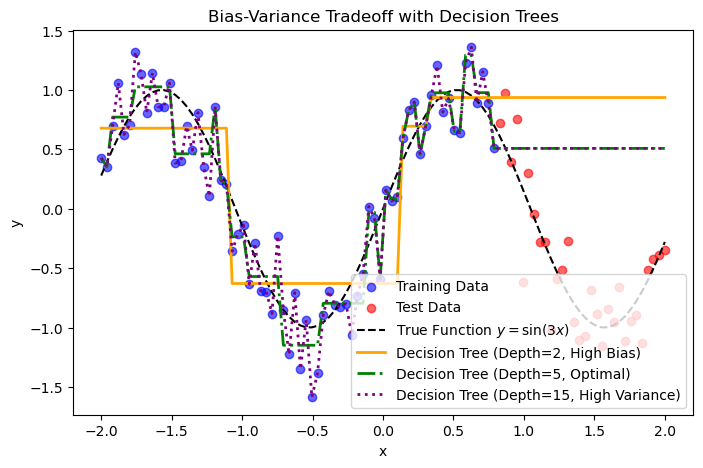

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Generate dataset
np.random.seed(42)
x_tree = np.linspace(-2, 2, 100).reshape(-1, 1)  # Feature range
y_true_tree = np.sin(3 * x_tree).ravel()  # True function
noise_tree = np.random.normal(0, 0.3, size=y_true_tree.shape)  # Noise
y_tree = y_true_tree + noise_tree  # Observed values

# Split dataset into training and test sets
x_train_tree, y_train_tree = x_tree[:70], y_tree[:70]
x_test_tree, y_test_tree = x_tree[70:], y_tree[70:]

# Train Decision Tree models with different depths
tree_low_depth = DecisionTreeRegressor(max_depth=2)  # High Bias (Underfitting)
tree_optimal_depth = DecisionTreeRegressor(max_depth=5)  # Optimal Tradeoff
tree_high_depth = DecisionTreeRegressor(max_depth=15)  # High Variance (Overfitting)

# Fit models
tree_low_depth.fit(x_train_tree, y_train_tree)
tree_optimal_depth.fit(x_train_tree, y_train_tree)
tree_high_depth.fit(x_train_tree, y_train_tree)

# Predictions
y_pred_low = tree_low_depth.predict(x_tree)
y_pred_optimal = tree_optimal_depth.predict(x_tree)
y_pred_high = tree_high_depth.predict(x_tree)

# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(x_train_tree, y_train_tree, label="Training Data", color="blue", alpha=0.6)
plt.scatter(x_test_tree, y_test_tree, label="Test Data", color="red", alpha=0.6)
plt.plot(x_tree, y_true_tree, label="True Function $y = \sin(3x)$", color="black", linestyle="dashed")

# Model predictions
plt.plot(x_tree, y_pred_low, label="Decision Tree (Depth=2, High Bias)", color="orange", linewidth=2)
plt.plot(x_tree, y_pred_optimal, label="Decision Tree (Depth=5, Optimal)", color="green", linestyle="dashdot", linewidth=2)
plt.plot(x_tree, y_pred_high, label="Decision Tree (Depth=15, High Variance)", color="purple", linestyle="dotted", linewidth=2)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Bias-Variance Tradeoff with Decision Trees")
plt.show()


AdaBoost Accuracy on Iris Dataset: 0.80


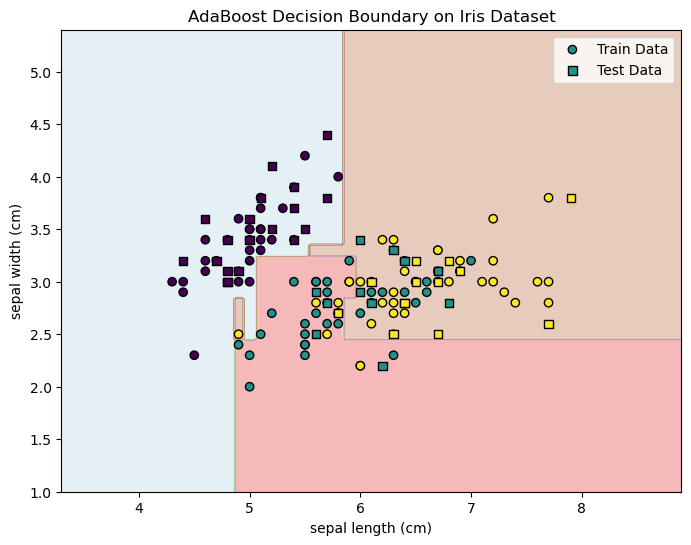

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Take first two features for visualization
y = iris.target

# Encode labels (not needed for iris, but useful for other datasets)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost with Decision Stumps (Weak Learners)
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump
    n_estimators=50,
    algorithm="SAMME",  # Multi-class AdaBoost
    learning_rate=1.0,
    random_state=42
)
adaboost.fit(X_train, y_train)

# Predict and evaluate
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy on Iris Dataset: {accuracy:.2f}")

# Decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolor='k', label="Test Data")
plt.title("AdaBoost Decision Boundary on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()


In [31]:
### Adaboost classifier for heardisease dataset in kaggle

In [64]:
df=pd.read_csv('heart.csv')

In [65]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [66]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [67]:
X=df.drop(['target'],axis=1)

In [68]:
y=df['target']

In [69]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [70]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# Train AdaBoost with Decision Stumps (Weak Learners)
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump
    n_estimators=50,
    algorithm="SAMME",  # Multi-class AdaBoost
    learning_rate=1.0,
    random_state=42
)

In [72]:
adaboost.fit(X_train, y_train)

# Predict and evaluate
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy on the test Dataset: {accuracy:.2f}")

AdaBoost Accuracy on the test Dataset: 0.82


In [73]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[125  34]
 [ 21 128]]


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       159
           1       0.79      0.86      0.82       149

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



In [82]:
y_pred_proba=adaboost.predict_proba(X_test)

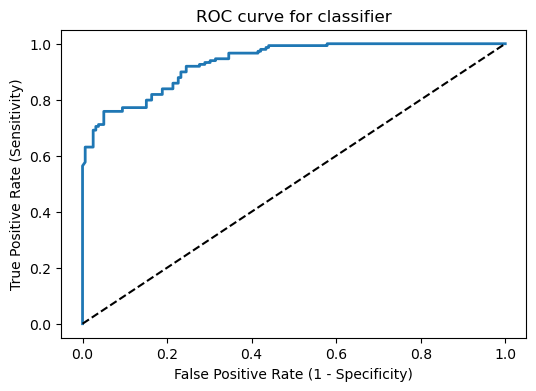

In [90]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [93]:
### Now model code for gradient boosting classifier algorithm
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [95]:
gbc.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbc.predict(X_test)
y_pred_proba= gbc.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy on the test Dataset: {accuracy:.2f}")

AdaBoost Accuracy on the test Dataset: 0.95


In [96]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[151   8]
 [  7 142]]


In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.95      0.95      0.95       149

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



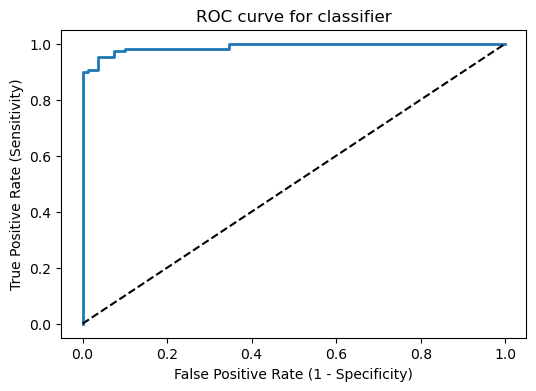

In [98]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()